# Setup

In [25]:
# Basic Python

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta, date
from tqdm import tqdm

# Quant Libraries

import yfinance as yf # yahoo finance PyPi for getting stock data

In [41]:
def curr_val(df):

    time = datetime.now()

    if time.weekday() == 5:
        time = time - timedelta(1)
    elif time.weekday() == 6:
        time = time - timedelta(2)
        

    date = df['real_date']
    value = df['value']

    index = 0

    while df['active'][index] == 1:
        index += 1

    week_prtf = curr_prtf(df, date[index - 1])

    old_price = prtf_price(week_prtf, date[index - 1], True)
    new_price = prtf_price(week_prtf, time, False)

    val = value[index - 1] * new_price / old_price

    return (val - 1) * 100, time

def curr_prtf(df, date):

    stocks = stock_list(df)
    prtf = {}

    for i in range(len(stocks)):

        prtf[stocks[i]] = df.loc[df['real_date'] == date, stocks[i]].values[0]

    return prtf

def prtf_price(prtf, date, morning):

    tot_price = 0
    stocks = list(prtf.keys())
    values = list(prtf.values())

    for i in range(len(prtf)):

        tot_price += price(stocks[i], date, morning) * values[i]

    return tot_price

def price(stk, date, morning):

    if morning:
        try:
            return yf.download(stk, start=date, end=date + timedelta(1), interval='1d', progress=False)['Open'].values[0]
        except:
            return yf.download(stk, start=date + timedelta(1), end=date + timedelta(2), interval='1d', progress=False)['Open'].values[0]
    else:
        return yf.download(stk, start=date, end=date, interval='1d' , progress=False)['Close'].values[0]

def update_row(df):

    index = 0

    while df['active'][index] == 1:
        index += 1

    print(index)

    curr_date = df['real_date'][index]
    prev_date = df['real_date'][index - 1]

    print(curr_date)
    print(datetime.now())

    if curr_date > datetime.now():
        print("It is not recent enough to make that change")

    else:
        print("Making that change")

        stocks = stock_list(df)
        new_prices =[]

        for j in range(len(stocks)):
            print(stocks[j])
            new_price = price(stocks[j], curr_date, True)
            old_price = price(stocks[j], prev_date, True)
            
            new_prices.append(df[stocks[j]][index - 1] * new_price / old_price)

        sum = 0 # Calculating average
        for k in range(len(stocks)):
            sum += new_prices[k]
        for q in range(len(stocks)):
            df[stocks[q]][index] = new_prices[q] / sum + df[stocks[q]][index]

        week_prtf = curr_prtf(df, prev_date)

        old_prtf = prtf_price(week_prtf, prev_date, True)
        new_prtf = prtf_price(week_prtf, curr_date, True)

        df['value'][index] = df['value'][index - 1] * new_prtf / old_prtf

        df['active'][index] = 1
        df.to_csv('equate_prtf.csv', index=False)
        print("Changes made")

def stock_list(df):

    lst = df.columns.to_list()
    lst.remove('real_date')
    return lst[3:-1]

prtf_df = pd.read_csv('equate_prtf.csv')
date_format = "%Y-%m-%d"
prtf_df['real_date'] = None
prtf_df['S&P 500'] = None
for i in range(len(prtf_df)):
    prtf_df['real_date'][i] = datetime.strptime(prtf_df['date'][i], date_format)

<ipython-input-41-ee1c50a2637c>:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prtf_df['real_date'][i] = datetime.strptime(prtf_df['date'][i], date_format)
<ipython-input-41-ee1c50a2637c>:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prtf_df['real_date'][i] = datetime.strptime(prtf_df['date'][i], date_format)
<ipython-input-41-ee1c50a2637c>:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prtf_df['real_date'][i] = datetime.s

# Current Performance

In [42]:
print(stock_list(prtf_df))

['L.TO', 'DOL.TO', 'KILO.TO', 'VFV.TO', 'ALA.TO']


In [43]:
results, time = curr_val(prtf_df)

print("The EQUATE Fund has returned ", round(curr_val(prtf_df)[0], 3), "% at time ", time)


1 Failed download:
['L.TO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2024-02-19 00:00:00 -> 2024-02-20 00:00:00)')

1 Failed download:
['DOL.TO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2024-02-19 00:00:00 -> 2024-02-20 00:00:00)')



1 Failed download:
['KILO.TO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2024-02-19 00:00:00 -> 2024-02-20 00:00:00)')

1 Failed download:
['VFV.TO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2024-02-19 00:00:00 -> 2024-02-20 00:00:00)')

1 Failed download:
['ALA.TO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2024-02-19 00:00:00 -> 2024-02-20 00:00:00)')

1 Failed download:
['L.TO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2024-02-19 00:00:00 -> 2024-02-20 00:00:00)')

1 Failed download:
['DOL.TO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2024-02-19 00:00:00 -> 2024-02-20 00:00:00)')

1 Failed download:
['KILO.TO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2024-02-19 00:00:00 -> 2024-02-20 00:00:00)')

1 Failed download:
['VFV.TO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2024-02-19 00:00:

The EQUATE Fund has returned  8.196 % at time  2024-02-23 11:39:00.250801


## S&P500 Benchmark

In [45]:
today = datetime.now()
date_format = "%Y-%m-%d"
index_fund = 'VFV.TO'
start = datetime.strptime('2024-01-15', date_format)
og_price = yf.download(index_fund, start=start, end=start + timedelta(1), interval='1d', progress=False)['Open'].values[0]
curr_price = yf.download(index_fund, start=today, end=today + timedelta(1), interval='1d', progress=False)['Close'].values[0]

print("The S&P500 has returned ", round(100 * (curr_price - og_price) / og_price, 3), "% at time ", today)

The S&P500 has returned  7.246 % at time  2024-02-24 11:39:29.429397


## Plotting Returns

<ipython-input-59-cdffc701d8ad>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prtf_df['S&P 500'][0] = 0
<ipython-input-59-cdffc701d8ad>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prtf_df['S&P 500'][index] = price('VFV.TO', prtf_df['real_date'][index], True) / og_price - 1
<ipython-input-59-cdffc701d8ad>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prtf_df['S&P 500'][index] = price('VFV.TO', prtf_df['real_date'][index], T

2024-01-15 00:00:00


<ipython-input-59-cdffc701d8ad>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prtf_df['S&P 500'][index] = price('VFV.TO', prtf_df['real_date'][index], True) / og_price - 1
<ipython-input-59-cdffc701d8ad>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prtf_df['S&P 500'][index] = price('VFV.TO', datetime.now(), True) / og_price - 1

1 Failed download:
['L.TO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2024-02-19 00:00:00 -> 2024-02-20 00:00:00)')

1 Failed download:
['DOL.TO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2024-02-19 00:00:00 -> 2024-02-20 00:00:0

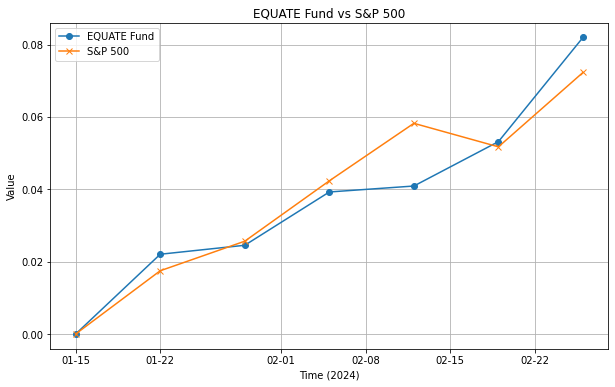

<ipython-input-59-cdffc701d8ad>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prtf_df['value'][index] = 1


In [59]:
start_date = prtf_df['real_date'][0]
print(start_date)

og_price = yf.download('VFV.TO', start=prtf_df['real_date'][0], end=prtf_df['real_date'][0] + timedelta(1), interval='1d', progress=False)['Open'].values[0]

prtf_df['S&P 500'][0] = 0

index = 1

while prtf_df['active'][index] == 1:
        prtf_df['S&P 500'][index] = price('VFV.TO', prtf_df['real_date'][index], True) / og_price - 1
        index += 1

prtf_df['S&P 500'][index] = price('VFV.TO', datetime.now(), True) / og_price - 1
prtf_df['value'][index], time = curr_val(prtf_df)
prtf_df['value'][index] = prtf_df['value'][index] / 100 + 1

plt.figure(figsize=(10, 6))
plt.plot(prtf_df['real_date'][:index + 1], prtf_df['value'].iloc[:index + 1] - 1, label='EQUATE Fund', marker='o')
plt.plot(prtf_df['real_date'][:index + 1], prtf_df['S&P 500'].iloc[:index + 1], label='S&P 500', marker='x')
plt.title('EQUATE Fund vs S&P 500') 
plt.xlabel('Time (2024)')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%m-%d'))
plt.show()

prtf_df['value'][index] = 1

# Testing

In [ ]:
[100, 120, 130, 12412, 23423, 23423]

In [7]:
update_row(prtf_df)


1 Failed download:
['L.TO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2024-02-19 00:00:00 -> 2024-02-20 00:00:00)')


5
2024-02-19 00:00:00
2024-02-23 16:55:42.860156
Making that change
L.TO



1 Failed download:
['DOL.TO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2024-02-19 00:00:00 -> 2024-02-20 00:00:00)')


DOL.TO
KILO.TO



1 Failed download:
['KILO.TO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2024-02-19 00:00:00 -> 2024-02-20 00:00:00)')

1 Failed download:
['VFV.TO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2024-02-19 00:00:00 -> 2024-02-20 00:00:00)')


VFV.TO



1 Failed download:
['ALA.TO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2024-02-19 00:00:00 -> 2024-02-20 00:00:00)')


ALA.TO


<ipython-input-6-cf187f2e0527>:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[stocks[q]][index] = new_prices[q] / sum + df[stocks[q]][index]
<ipython-input-6-cf187f2e0527>:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[stocks[q]][index] = new_prices[q] / sum + df[stocks[q]][index]
<ipython-input-6-cf187f2e0527>:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[stocks[q]][index] = new_prices[q] / sum + df[stocks[q]][index

Changes made


<ipython-input-6-cf187f2e0527>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['value'][index] = df['value'][index - 1] * new_prtf / old_prtf
<ipython-input-6-cf187f2e0527>:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['active'][index] = 1
